In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from scipy import stats
import os

In [2]:
os.path.abspath("")

'C:\\Users\\koryb\\Documents'

In [3]:
Horror_Data = pd.read_csv('horror_movie_data.csv')

In [4]:
Horror_Data.head(3)

,movie_title,release_year,run_time_minute,kill_count,male_death,female_death,other_death
0,The Blackening,2023,97,6,5,1,0
1,Mr. Crocket,2024,88,9,9,0,0
2,"As Above, So Below",2014,93,3,2,1,0


Visualizations to make:

    - Movies with the most kills (bar chart of top 5)
    - Most kills grouped by year regardless of title/franchise (bar chart with year X axis)
    - Male deaths / Female deaths / Other deaths
    - Highest/Lowest ratio of male/female deaths (top 1 movie for each, which has highest varaince, lowest variance)
    - Most deaths per minute (highest/lowest film)

In [5]:
Horror_Data.sort_values(by=['kill_count'], ascending=False).head(3)

,movie_title,release_year,run_time_minute,kill_count,male_death,female_death,other_death
149,The Cabin in the Woods,2011,95,6870000000,3440000000,3430000000,0
48,Emesis Blue,2023,108,800054,800053,1,0
69,Dude Bro Party Massacre III,2015,91,4269,15,4,4250


In [6]:
Remove_Outliers = Horror_Data.sort_values(by=['kill_count'], ascending=False)
Remove_Outliers = Remove_Outliers[3:] 
Remove_Outliers.head(3)

,movie_title,release_year,run_time_minute,kill_count,male_death,female_death,other_death
57,The Collection,2012,82,287,32,43,212
153,Brightburn,2019,90,274,3,3,268
7,28 Weeks Later,2007,100,237,132,38,67


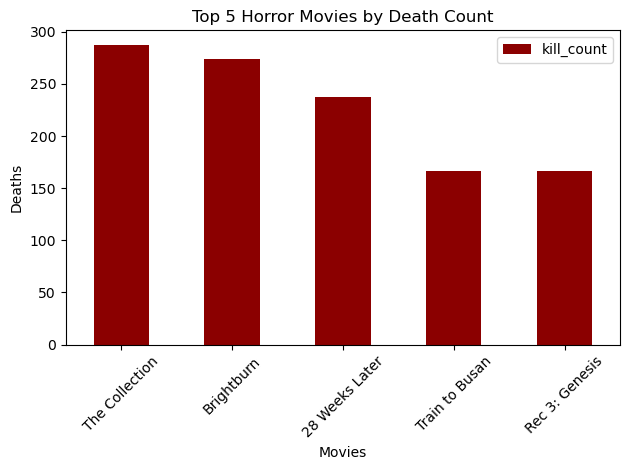

In [7]:
Top_Five = Remove_Outliers.sort_values(by=['kill_count'], ascending=False).head(5)
Top_Kills = Top_Five.plot.bar(x='movie_title', y='kill_count', color='darkred')
plt.xticks(rotation=45)
plt.xlabel('Movies')
plt.ylabel('Deaths')
plt.title('Top 5 Horror Movies by Death Count')
plt.tight_layout() 

In [8]:
Yearly_Deaths = Remove_Outliers.groupby(['release_year']).sum()
Yearly_Deaths.drop(columns=['movie_title', 'run_time_minute'], inplace=True)
Yearly_Deaths = Yearly_Deaths.reset_index()
Yearly_Deaths.head()

,release_year,kill_count,male_death,female_death,other_death
0,2005,120,68,43,9
1,2006,250,128,84,38
2,2007,539,313,97,129
3,2008,68,38,29,1
4,2009,212,101,43,67


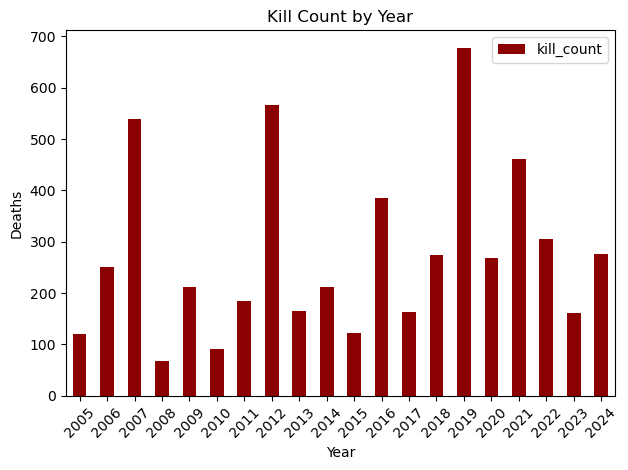

In [9]:
Yearly_Kills = Yearly_Deaths.plot.bar(x='release_year', y='kill_count', color='darkred')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Kill Count by Year')
plt.tight_layout()

In [10]:
x, y  = Yearly_Deaths['release_year'], Yearly_Deaths['kill_count']
corr_test = stats.pearsonr(x, y)
corr_test

PearsonRResult(statistic=np.float64(0.21585249177785626), pvalue=np.float64(0.36071385597032035))

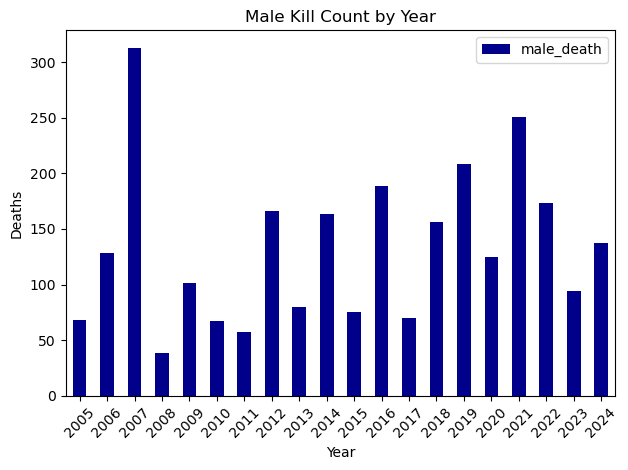

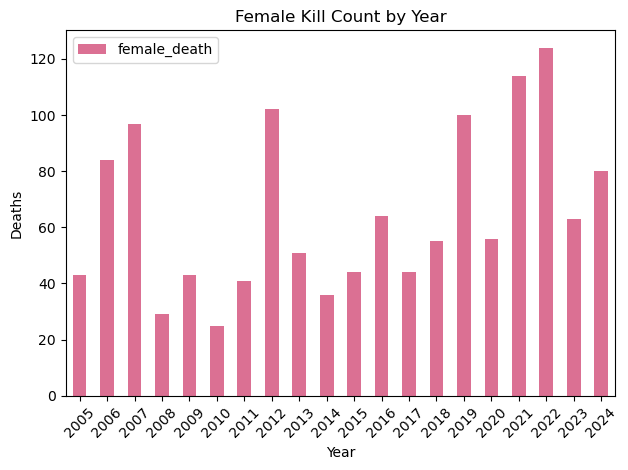

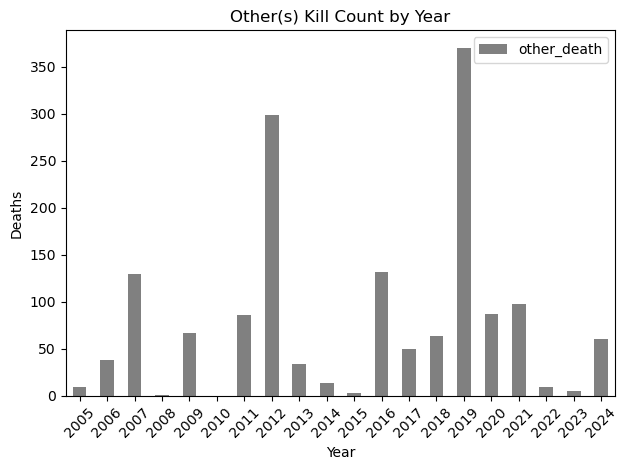

In [11]:
Male_Kills = Yearly_Deaths.plot.bar(x='release_year', y='male_death', color='darkblue')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Male Kill Count by Year')
plt.tight_layout()

Female_Kills = Yearly_Deaths.plot.bar(x='release_year', y='female_death', color='palevioletred')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Female Kill Count by Year')
plt.tight_layout()

Other_Kills = Yearly_Deaths.plot.bar(x='release_year', y='other_death', color='gray')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Other(s) Kill Count by Year')
plt.tight_layout()

In [12]:
malex, maley  = Yearly_Deaths['release_year'], Yearly_Deaths['male_death']
male_corr_test = stats.pearsonr(malex, maley)
male_corr_test

PearsonRResult(statistic=np.float64(0.2126437699180922), pvalue=np.float64(0.3680695138575473))

In [13]:
femalex, femaley  = Yearly_Deaths['release_year'], Yearly_Deaths['female_death']
female_corr_test = stats.pearsonr(femalex, femaley)
female_corr_test

PearsonRResult(statistic=np.float64(0.3802464348399479), pvalue=np.float64(0.09816380678428686))

In [14]:
otherx, othery  = Yearly_Deaths['release_year'], Yearly_Deaths['other_death']
other_corr_test = stats.pearsonr(otherx, othery)
other_corr_test

PearsonRResult(statistic=np.float64(0.1045350060350544), pvalue=np.float64(0.6609527503155916))

In [15]:
Horror_Data['male_ratio'] = Horror_Data['male_death'] / Horror_Data['kill_count']
Horror_Data['female_ratio'] = Horror_Data['female_death'] / Horror_Data['kill_count']

highest_male_ratio = Horror_Data.loc[Horror_Data['male_ratio'].idxmax()]

highest_female_ratio = Horror_Data.loc[Horror_Data['female_ratio'].idxmax()]

print("Highest Male Death Ratio:")
print(highest_male_ratio[['movie_title', 'male_ratio', 'male_death', 'female_death']])

print("\nHighest Female Death Ratio:")
print(highest_female_ratio[['movie_title', 'female_ratio', 'male_death', 'female_death']])

Highest Male Death Ratio:
movie_title     Mr. Crocket
male_ratio              1.0
male_death                9
female_death              0
Name: 1, dtype: object

Highest Female Death Ratio:
movie_title     The Substance
female_ratio              1.0
male_death                  0
female_death                4
Name: 4, dtype: object


In [16]:
Horror_Data['deaths_per_minute'] = Horror_Data['kill_count'] / Horror_Data['run_time_minute']

highest_kill_ratio = Horror_Data.loc[Horror_Data['deaths_per_minute'].idxmax()]
lowest_kill_ratio = Horror_Data.loc[Horror_Data['deaths_per_minute'].idxmin()]

print("Highest Deaths per Minute of Film:")
print(highest_kill_ratio[['movie_title', 'deaths_per_minute', 'kill_count']])

print("\nLowest Deaths per Minute of Film:")
print(lowest_kill_ratio[['movie_title', 'deaths_per_minute', 'kill_count']])


Highest Deaths per Minute of Film:
movie_title          The Cabin in the Woods
deaths_per_minute           72315789.473684
kill_count                       6870000000
Name: 149, dtype: object

Lowest Deaths per Minute of Film:
movie_title             Creep
deaths_per_minute    0.012195
kill_count                  1
Name: 10, dtype: object


In [21]:
# Filter out invalid data
Horror_Data = Horror_Data[Horror_Data['kill_count'] > 0]
Horror_Data = Horror_Data.dropna(subset=['male_death', 'female_death', 'kill_count'])

# Calculate ratios
Horror_Data['male_ratio'] = Horror_Data['male_death'] / Horror_Data['kill_count']
Horror_Data['female_ratio'] = Horror_Data['female_death'] / Horror_Data['kill_count']

# Check top 5 male/female ratio entries
top_male_ratios = Horror_Data.sort_values(by='male_ratio', ascending=False).head(8)
top_female_ratios = Horror_Data.sort_values(by='female_ratio', ascending=False).head(8)

print("Top 5 Male Death Ratios:")
print(top_male_ratios[['movie_title', 'male_ratio', 'male_death', 'female_death', 'kill_count']])

print("\nTop 5 Female Death Ratios:")
print(top_female_ratios[['movie_title', 'female_ratio', 'male_death', 'female_death', 'kill_count']])


Top 5 Male Death Ratios:
                           movie_title  male_ratio  male_death  female_death  \
1                          Mr. Crocket         1.0           9             0   
10                               Creep         1.0           1             0   
65                     The Black Phone         1.0           7             0   
83            Tremors: Shreiker Island         1.0          12             0   
150                   Better Watch Out         1.0           3             0   
131                              Rec 2         1.0          13             0   
147  Scary Stories to Tell in the Dark         1.0           4             0   
105                      12 Hour Shift         1.0           5             0   

     kill_count  
1             9  
10            1  
65            7  
83           12  
150           3  
131          13  
147           4  
105           5  

Top 5 Female Death Ratios:
                  movie_title  female_ratio  male_death  female_